In [1]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import matplotlib
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from collections import OrderedDict

majorLocator   = MultipleLocator(20)
majorFormatter = FormatStrFormatter('%d')
minorLocator   = MultipleLocator(5)

def db2mag(x):
    if isinstance(x, list):
        return [db2mag(val) for val in x]
    return 10**(x/20)

def hz_to_sample(x, sample_rate):
    if isinstance(x, list):
        return [hz_to_sample(x, sample_rate) for val in x]
    return x * (2*np.pi / sample_rate)

def sample_to_hz(x, sample_rate):
    if isinstance(x, list):
        return [sample_to_hz(x, sample_rate) for val in x]
    
    return (sample_rate/2)*(x / (np.pi))

%pylab inline

# Forçar o uso de LaTeX
from matplotlib import rc
##rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 

sample_rate = 20000
nyquist = sample_rate/2

# Construir o vetor frequência

freqs_stop_1 = linspace(0,300,5000)
gains_stop_1 = [-80] * len(freqs_stop_1)

freqs_pass = linspace(300, 4000, 5000)
gains_pass = [1] * len(freqs_pass)

freqs_stop_2 = linspace(4000, nyquist, 5000)
gains_stop_2 = [-80] * len(freqs_stop_2)

freqs = list(freqs_stop_1) + list(freqs_pass) + list(freqs_stop_2)
gains = gains_stop_1 + gains_pass + gains_stop_2

freqs[-1] = nyquist
gains[-1] = 0

gains_nodb = gains
gains = db2mag(gains)
gains[-1] = 0


Populating the interactive namespace from numpy and matplotlib


In [18]:
len(freqs)
f,g = freqs[:-1], gains_nodb[:-1]

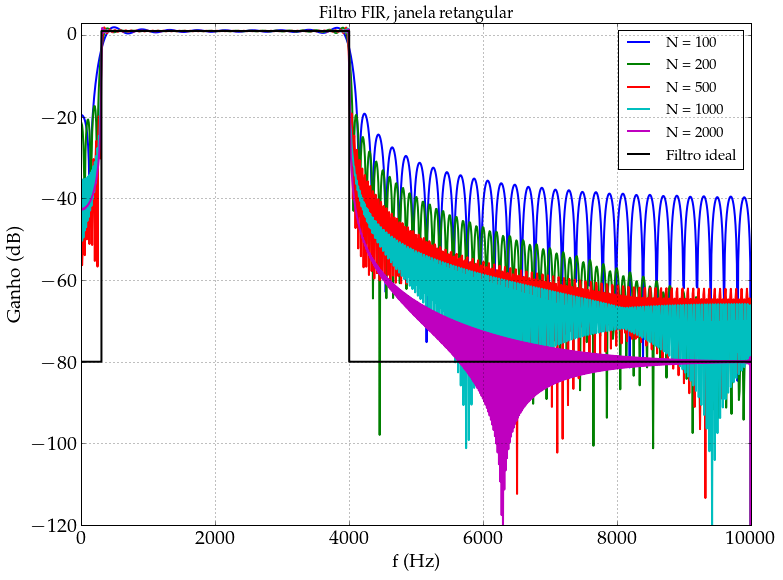

In [27]:
fig = plt.figure(1, figsize=(12,9))
freq_range = np.linspace(hz_to_sample(1, sample_rate), hz_to_sample(10000, sample_rate), 1000)
leg = []

for tap_number in [100, 200, 500, 1000, 2000]:
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window='boxcar')
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w, 20 * np.log10(abs(h)), linewidth=2)
    leg.append("N = {}".format(tap_number))

plt.plot(np.array(f), g, 'k-', linewidth=2)
leg.append("Filtro ideal")
plt.grid()
plt.title('Filtro FIR, janela retangular', fontsize=16)
plt.legend(leg, loc="best", fontsize=15)
plt.xlabel('f (Hz)', fontsize=19)
plt.ylabel('Ganho (dB)', fontsize=19)
plt.axis([0, nyquist, -120, 3])
plt.savefig('bandpass_FIR_rectangular_window.eps')


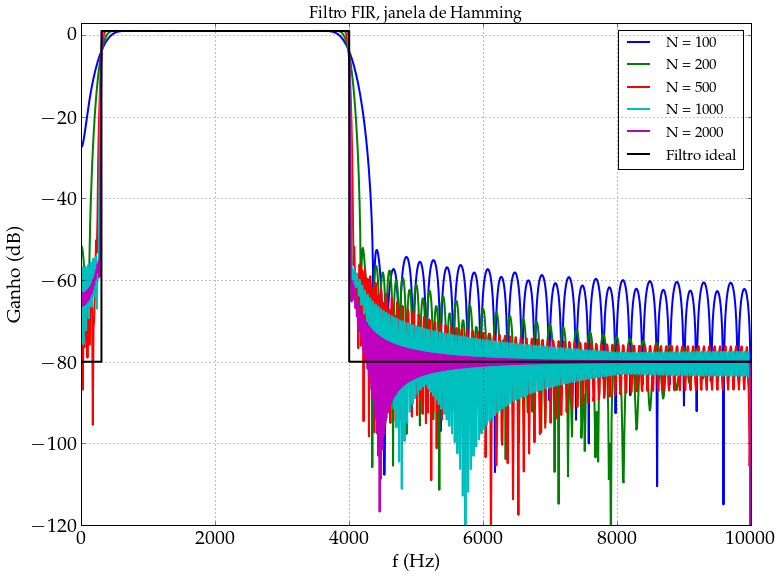

In [28]:
fig = plt.figure(1, figsize=(12,9))
freq_range = np.linspace(hz_to_sample(1, sample_rate), hz_to_sample(10000, sample_rate), 1000)
leg = []

for tap_number in [100, 200, 500, 1000, 2000]:
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window='hamming')
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w, 20 * np.log10(abs(h)), linewidth=2)
    leg.append("N = {}".format(tap_number))

plt.plot(np.array(f), g, 'k-', linewidth=2)
leg.append("Filtro ideal")
plt.grid()
plt.title('Filtro FIR, janela de Hamming', fontsize=16)
plt.legend(leg, loc="best", fontsize=15)
plt.xlabel('f (Hz)', fontsize=19)
plt.ylabel('Ganho (dB)', fontsize=19)
plt.axis([0, nyquist, -120, 3])
plt.savefig('bandpass_FIR_hamming_window.eps')


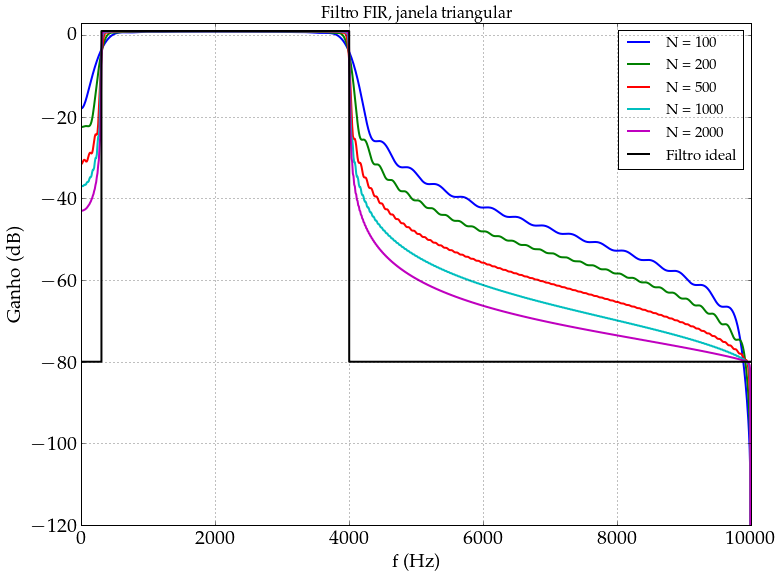

In [29]:
fig = plt.figure(1, figsize=(12,9))
freq_range = np.linspace(hz_to_sample(1, sample_rate), hz_to_sample(10000, sample_rate), 1000)
leg = []

for tap_number in [100, 200, 500, 1000, 2000]:
    b = signal.firwin2(tap_number, freqs, gains, nyq=nyquist, window='triang')
    w, h = signal.freqz(b, worN=freq_range)
    w = sample_to_hz(w, sample_rate)
    plt.plot(w, 20 * np.log10(abs(h)), linewidth=2)
    leg.append("N = {}".format(tap_number))

plt.plot(np.array(f), g, 'k-', linewidth=2)
leg.append("Filtro ideal")
plt.grid()
plt.axis([0, nyquist, -120, 3])

plt.title('Filtro FIR, janela triangular', fontsize=16)
plt.legend(leg, loc="best", fontsize=15)
plt.xlabel('f (Hz)', fontsize=19)
plt.ylabel('Ganho (dB)', fontsize=19)
plt.savefig('bandpass_FIR_triang_window.eps')


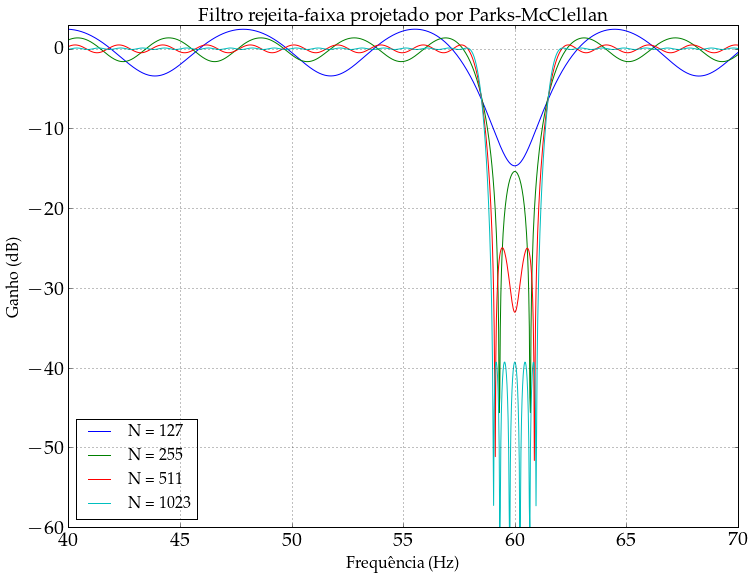

In [11]:
# Número de taps PRECISA ser ímpar para filtro bandstop
# Fonte: http://stackoverflow.com/questions/27754979/python-scipy-signal-remez-high-pass-filter-design-yields-strange-transfer-functi

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(111)

for taps in [127, 255, 511, 1023]:
#for taps in [128, 256, 512, 1024, 2048]:
    bpass = signal.remez(taps, [0, 58, 59, 61, 62, 250], [1, 1e-12, 1], Hz=500, maxiter=1000)  
    freq, response = signal.freqz(bpass, worN=10000)
    ampl = np.abs(response)
    ax1.plot(500*freq/(2*np.pi), 20*log10(ampl))  # freq in Hz

plt.axis([40, 70, -60, 3])    
plt.xlabel("Frequ\^encia (Hz)", fontsize=16)
plt.ylabel("Ganho (dB)", fontsize=16)
plt.title("Filtro rejeita-faixa projetado por Parks-McClellan", fontsize=19)
plt.grid()
plt.legend(["N = 127", "N = 255", "N = 511", "N = 1023"], fontsize=16, loc='best')
plt.savefig('bandstop_fir_pm.eps')

In [5]:
500*freq/(2*np.pi)

array([   0.        ,    0.48828125,    0.9765625 ,    1.46484375,
          1.953125  ,    2.44140625,    2.9296875 ,    3.41796875,
          3.90625   ,    4.39453125,    4.8828125 ,    5.37109375,
          5.859375  ,    6.34765625,    6.8359375 ,    7.32421875,
          7.8125    ,    8.30078125,    8.7890625 ,    9.27734375,
          9.765625  ,   10.25390625,   10.7421875 ,   11.23046875,
         11.71875   ,   12.20703125,   12.6953125 ,   13.18359375,
         13.671875  ,   14.16015625,   14.6484375 ,   15.13671875,
         15.625     ,   16.11328125,   16.6015625 ,   17.08984375,
         17.578125  ,   18.06640625,   18.5546875 ,   19.04296875,
         19.53125   ,   20.01953125,   20.5078125 ,   20.99609375,
         21.484375  ,   21.97265625,   22.4609375 ,   22.94921875,
         23.4375    ,   23.92578125,   24.4140625 ,   24.90234375,
         25.390625  ,   25.87890625,   26.3671875 ,   26.85546875,
         27.34375   ,   27.83203125,   28.3203125 ,   28.80859